In [1]:
from google.colab import files
uploaded = files.upload()

Saving application_data.csv to application_data.csv


This is done with the following coding guide from Kaggle : https://www.kaggle.com/code/kshitijthareja/ml-project-credit-card-fraud-detection

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd #not there in his code, probably too basic
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [31]:
df = pd.read_csv('application_data.csv')

In [32]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
print("Dataframe shape: ", df.shape)
print(df.info())

Dataframe shape:  (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


In [33]:
correlation = df_encoded.corr(numeric_only=True)['TARGET'].abs().sort_values(ascending=False)
top_features_corr = correlation.drop('TARGET').head(4).index.tolist()

In [34]:
# 3. Print them
print("Top 4 features most correlated with TARGET:")
print(top_features_corr)

Top 4 features most correlated with TARGET:
['NAME_EDUCATION_TYPE_Higher education', 'REGION_RATING_CLIENT', 'DAYS_LAST_PHONE_CHANGE', 'NAME_EDUCATION_TYPE_Secondary / secondary special']


In [8]:
print("Null data: ", df.isna().sum())
print("Duplicate data: ", df.duplicated().sum())

Null data:  SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64
Duplicate data:  0


In [9]:
print("Features in the Dataset: ", df.columns.tolist())

Features in the Dataset:  ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AV

In [10]:
print(df.corr(numeric_only=True)['TARGET'].sort_values(ascending=False))
#feature selection or feature importance with pandas
#Computes the correlation matrix for all numeric columns in your DataFrame
#Extracts the column of correlations between every other feature and 'TARGET'
#.sort_values(ascending=False)	Sorts the features by how strongly correlated they are with 'TARGET', from most to least, so therefore clearly it has the strongest correlation with itself

TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
                                 ...   
FLOORSMAX_AVG                 -0.044003
DAYS_EMPLOYED                 -0.044932
EXT_SOURCE_1                  -0.155317
EXT_SOURCE_2                  -0.160472
EXT_SOURCE_3                  -0.178919
Name: TARGET, Length: 106, dtype: float64


Target value counts:  TARGET
0    282686
1     24825
Name: count, dtype: int64


<Axes: xlabel='TARGET'>

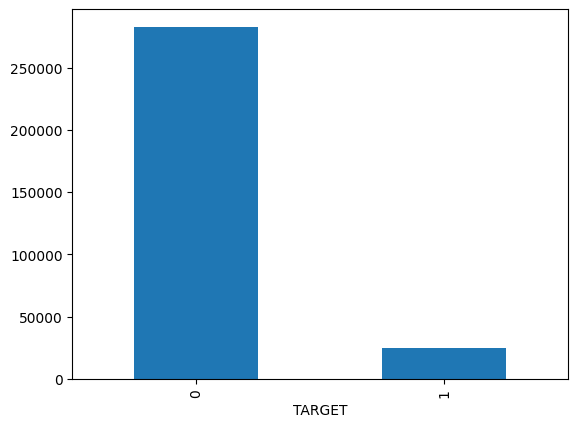

In [11]:
print("Target value counts: ", df['TARGET'].value_counts())
df['TARGET'].value_counts().plot(kind='bar')
#Data is obviously skewed (unbalanced), as it should be
#note that the other creditcard_2023 data is not skewed, it is more a idealistic data for fraud, just for tutorials

<Axes: xlabel='NAME_CONTRACT_TYPE'>

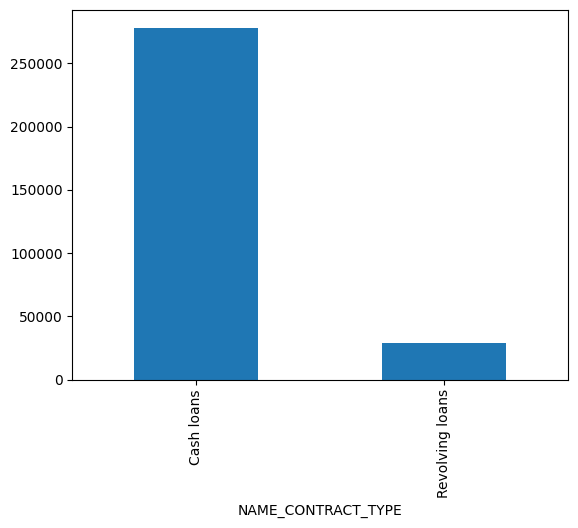

In [13]:
# We have Cash Loans, which have more probability of fraud
df['NAME_CONTRACT_TYPE'].value_counts().plot(kind='bar')

Cash loans are riskier in terms of fraud because they involve a lump-sum disbursement, giving fraudsters immediate access to funds with minimal traceability. In contrast, revolving loans like credit cards (I never thought about credit cards as loan, but they are!) are drawn gradually and are easier to monitor over time, making fraudulent activity more detectable through unusual spending patterns. As a result, fraud rates are often higher for cash loans than for revolving loans.

In [14]:
df.groupby('NAME_CONTRACT_TYPE')['TARGET'].mean()

,TARGET
NAME_CONTRACT_TYPE,
Cash loans,0.083459
Revolving loans,0.054783


<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='TARGET'>

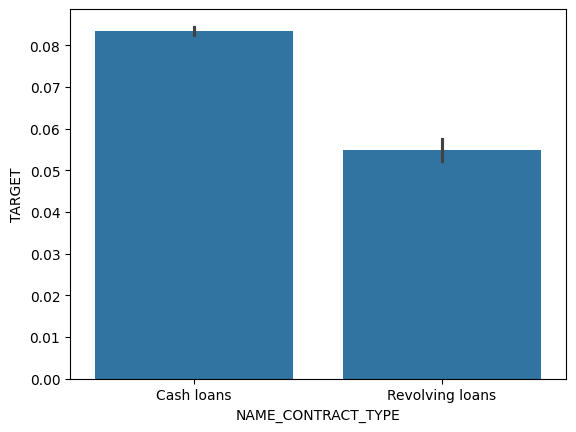

In [15]:
sns.barplot(x=df['NAME_CONTRACT_TYPE'], y=df['TARGET'])


In [16]:
df.isna().sum()


,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
...,...
AMT_REQ_CREDIT_BUREAU_DAY,41519
AMT_REQ_CREDIT_BUREAU_WEEK,41519
AMT_REQ_CREDIT_BUREAU_MON,41519
AMT_REQ_CREDIT_BUREAU_QRT,41519


In [19]:
# Choosing the important set of features for further analysis and training
#How do I know which features are important ?
df = df[['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'AMT_INCOME_TOTAL',
             'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
             'REGION_RATING_CLIENT', 'REG_REGION_NOT_WORK_REGION', 'DAYS_LAST_PHONE_CHANGE']]

In [20]:
print(df.shape)
print(df.info())

(307511, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TARGET                      307511 non-null  int64  
 1   NAME_CONTRACT_TYPE          307511 non-null  object 
 2   CODE_GENDER                 307511 non-null  object 
 3   FLAG_OWN_CAR                307511 non-null  object 
 4   AMT_INCOME_TOTAL            307511 non-null  float64
 5   AMT_CREDIT                  307511 non-null  float64
 6   AMT_ANNUITY                 307499 non-null  float64
 7   AMT_GOODS_PRICE             307233 non-null  float64
 8   NAME_EDUCATION_TYPE         307511 non-null  object 
 9   OCCUPATION_TYPE             211120 non-null  object 
 10  CNT_FAM_MEMBERS             307509 non-null  float64
 11  REGION_RATING_CLIENT        307511 non-null  int64  
 12  REG_REGION_NOT_WORK_REGION  307511 non-null  int64  
 13  D

In [25]:
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REG_REGION_NOT_WORK_REGION,DAYS_LAST_PHONE_CHANGE
0,1,Cash loans,M,N,202500.0,406597.5,24700.5,351000.0,Secondary / secondary special,Laborers,1.0,2,0,-1134.0
1,0,Cash loans,F,N,270000.0,1293502.5,35698.5,1129500.0,Higher education,Core staff,2.0,1,0,-828.0
2,0,Revolving loans,M,Y,67500.0,135000.0,6750.0,135000.0,Secondary / secondary special,Laborers,1.0,2,0,-815.0
3,0,Cash loans,F,N,135000.0,312682.5,29686.5,297000.0,Secondary / secondary special,Laborers,2.0,2,0,-617.0
4,0,Cash loans,M,N,121500.0,513000.0,21865.5,513000.0,Secondary / secondary special,Core staff,1.0,2,0,-1106.0


In [26]:
df.isna().sum()

,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
AMT_INCOME_TOTAL,0
AMT_CREDIT,0
AMT_ANNUITY,12
AMT_GOODS_PRICE,278
NAME_EDUCATION_TYPE,0
OCCUPATION_TYPE,96391


In [28]:
df.dropna(inplace=True)

<Axes: >

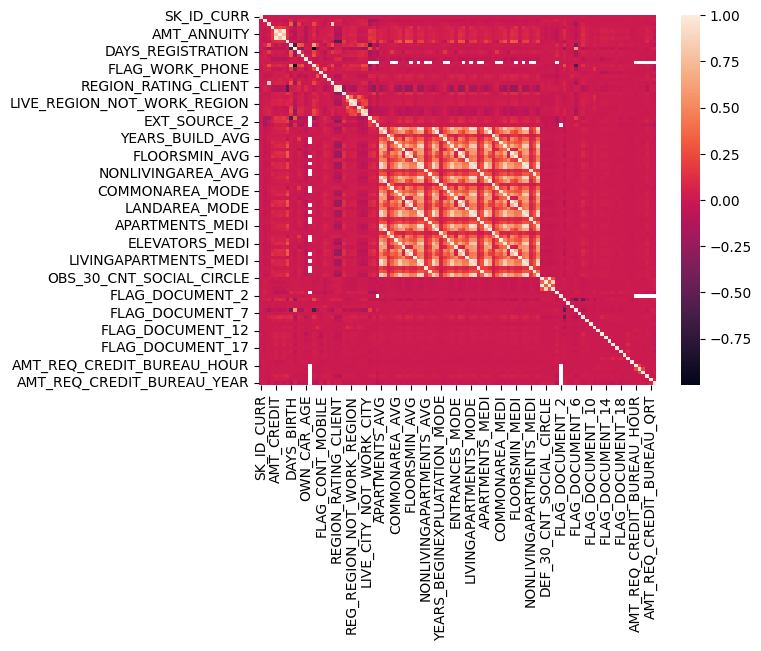

In [18]:
sns.heatmap(df.corr(numeric_only = True))
#This is the full correlation matrix

<Axes: >

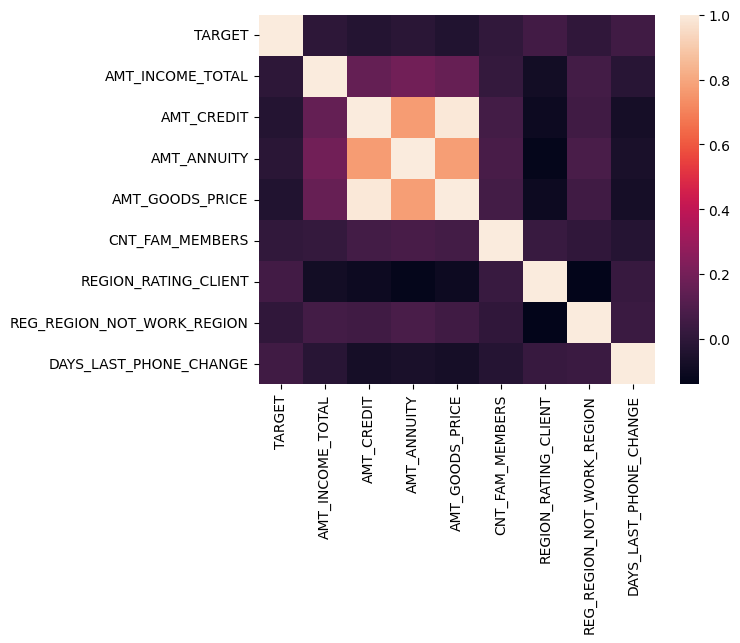

In [21]:
sns.heatmap(df.corr(numeric_only = True))
#This is for the selected features in the correlation matrix

Now we are in the ML phase of it

In [29]:
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns.difference(["TARGET"])
categorical_features = df.select_dtypes(include=["object"]).columns
print(f"Numerical features in data: {numerical_features}, \nCategorical features in data: {categorical_features}")

Numerical features in data: Index(['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL',
       'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT',
       'REG_REGION_NOT_WORK_REGION'],
      dtype='object'), 
Categorical features in data: Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE'],
      dtype='object')



Logistic Regression
-------------------


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.71      0.55      0.62     38472
           1       0.63      0.77      0.69     38471

    accuracy                           0.66     76943
   macro avg       0.67      0.66      0.66     76943
weighted avg       0.67      0.66      0.66     76943



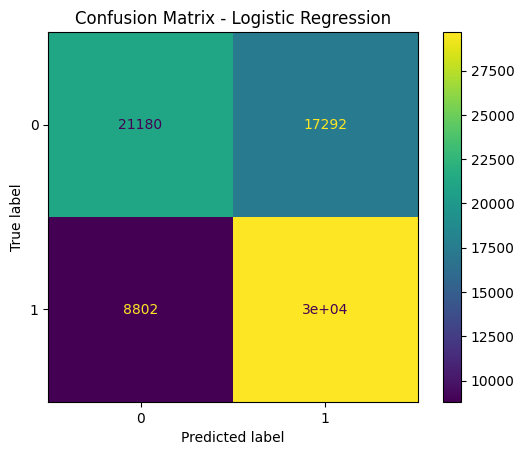

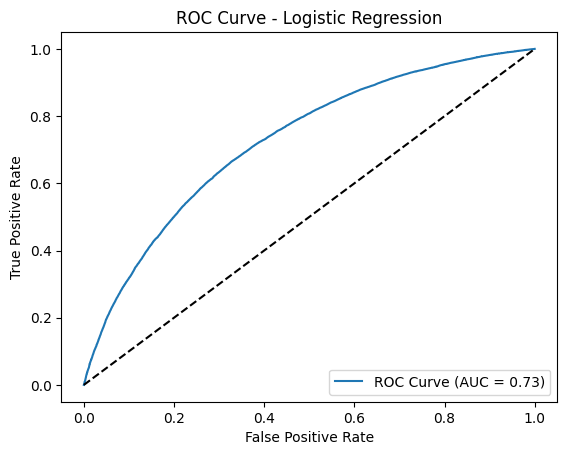

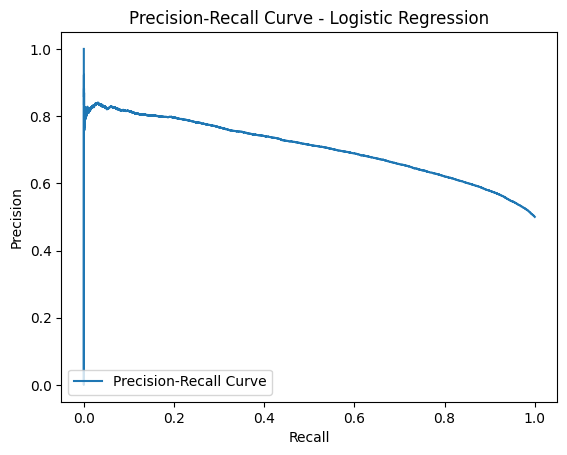


Random Forest
-------------
              precision    recall  f1-score   support

           0       0.84      0.87      0.86     38472
           1       0.87      0.84      0.85     38471

    accuracy                           0.85     76943
   macro avg       0.85      0.85      0.85     76943
weighted avg       0.85      0.85      0.85     76943



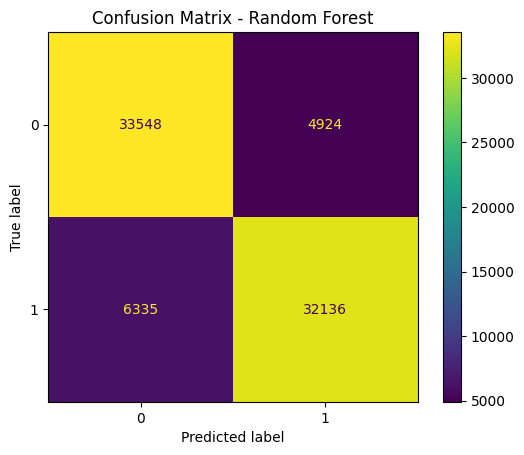

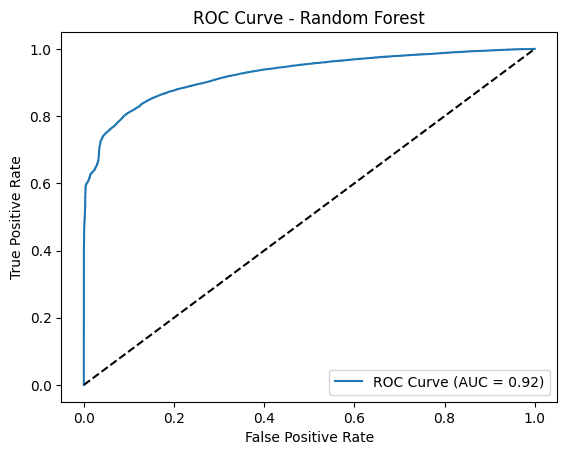

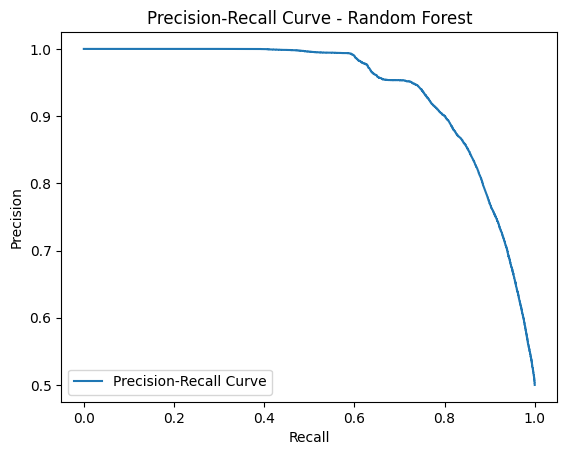


Decision Tree
-------------
              precision    recall  f1-score   support

           0       0.78      0.85      0.82     38472
           1       0.84      0.76      0.80     38471

    accuracy                           0.81     76943
   macro avg       0.81      0.81      0.81     76943
weighted avg       0.81      0.81      0.81     76943



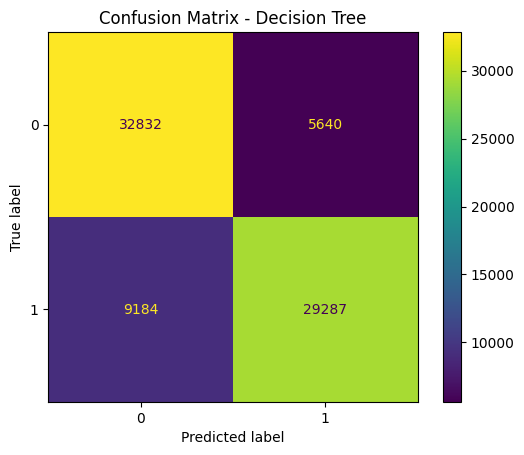

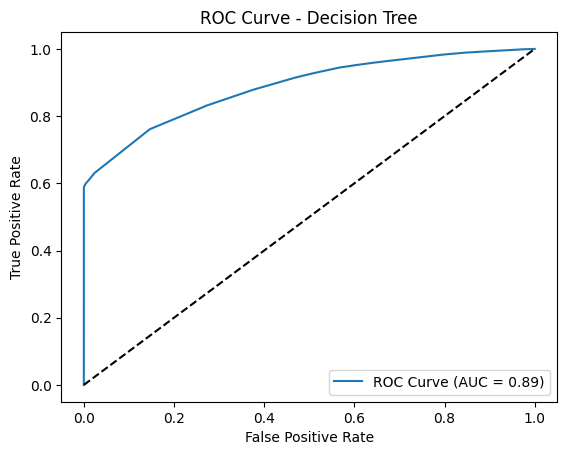

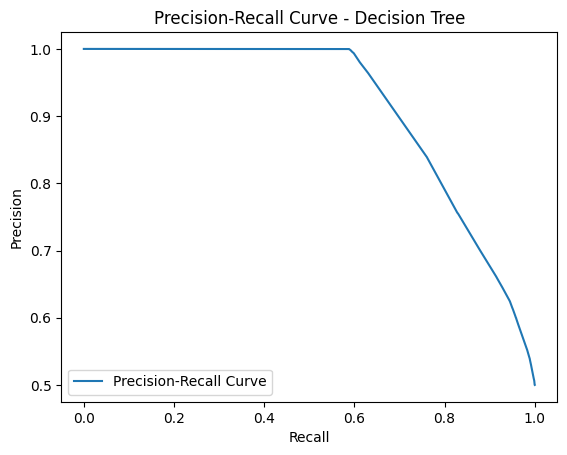


KNN
---
              precision    recall  f1-score   support

           0       0.87      0.94      0.91     38472
           1       0.94      0.86      0.90     38471

    accuracy                           0.90     76943
   macro avg       0.91      0.90      0.90     76943
weighted avg       0.91      0.90      0.90     76943



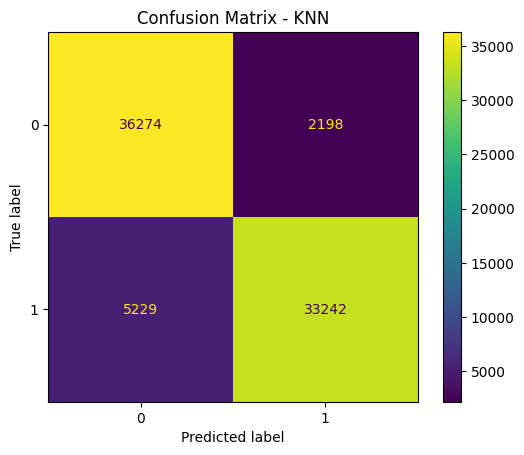

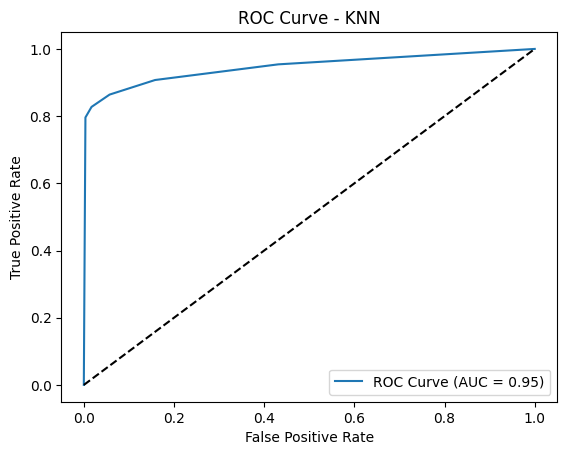

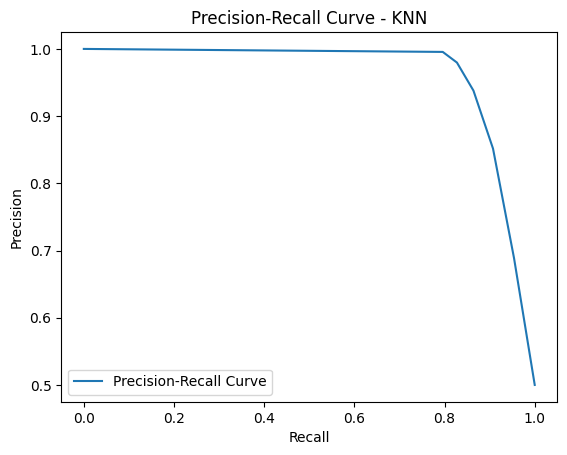

In [30]:
# Preprocessing: Encode categorical features
categorical_columns = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Target variable and features
X = df_encoded.drop('TARGET', axis=1)
y = df_encoded['TARGET']

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Scale the data for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, random_state=42, class_weight='balanced'),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Train, predict, and visualize for each model
for name, model in models.items():
    print(f"\n{name}\n{'-' * len(name)}")
    if name in ["Logistic Regression", "Decision Tree", "Random Forest"]:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_prob = model.predict_proba(X_test_scaled)[:, 1]

    # Classification report
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    ConfusionMatrixDisplay.from_estimator(model, X_test_scaled if name in ["SVM", "KNN"] else X_test, y_test)
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve - {name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    plt.figure()
    plt.plot(recall, precision, label='Precision-Recall Curve')
    plt.title(f'Precision-Recall Curve - {name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc='lower left')
    plt.show()